In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_colwidth', 200)

import re
import time
import datetime
import smtplib
import json

## Data Understanding

In [2]:
df = pd.read_csv('cleaned-mudah-apartment-kl-selangor.csv')
df.head()

,prop_name,monthly_rent,location,property_type,rooms,parking,bathroom,size(sq.ft.),furnished,region,near_KTM-LRT,minimart availability,security availability
0,The Hipster @ Taman Desa,4200,Taman Desa,Condominium,5,2,6,1842,2,Kuala Lumpur,0,1,1
1,Segar Courts,2300,Cheras,Condominium,3,1,2,1170,1,Kuala Lumpur,1,0,1
2,Sentul Point Suite Apartment,1700,Sentul,Apartment,2,1,2,743,1,Kuala Lumpur,1,1,1
3,Arte Mont Kiara,1299,Mont Kiara,Service Residence,1,1,1,494,0,Kuala Lumpur,0,1,1
4,Residensi Vista Wirajaya,1500,Setapak,Apartment,3,1,2,884,1,Kuala Lumpur,1,0,1


In [3]:
# data description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8930 entries, 0 to 8929
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   prop_name              8930 non-null   object
 1   monthly_rent           8930 non-null   int64 
 2   location               8930 non-null   object
 3   property_type          8930 non-null   object
 4   rooms                  8930 non-null   int64 
 5   parking                8930 non-null   int64 
 6   bathroom               8930 non-null   int64 
 7   size(sq.ft.)           8930 non-null   int64 
 8   furnished              8930 non-null   int64 
 9   region                 8930 non-null   object
 10  near_KTM-LRT           8930 non-null   int64 
 11  minimart availability  8930 non-null   int64 
 12  security availability  8930 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 907.1+ KB


In [4]:
import pandas as pd

# Assuming df is your DataFrame
df.rename(columns={'monthly_rent(RM/month)': 'monthly_rent'}, inplace=True)


In [5]:
# Check duplicate data
print("There are {} duplicate values.".format(df.duplicated().sum()))

There are 755 duplicate values.


In [6]:
# Drop duplicate
df = df.drop_duplicates()
print("There are {} duplicate values.".format(df.duplicated().sum()))

There are 0 duplicate values.


In [7]:
# Check missing values
print(df.isnull().sum(),"\n")
print('Number of records in total: {}\nNumber of records that have Nan values: {}'.format(df.shape[0], df.isnull().sum(axis=1).astype(bool).sum()))

prop_name                0
monthly_rent             0
location                 0
property_type            0
rooms                    0
parking                  0
bathroom                 0
size(sq.ft.)             0
furnished                0
region                   0
near_KTM-LRT             0
minimart availability    0
security availability    0
dtype: int64 

Number of records in total: 8175
Number of records that have Nan values: 0


In [8]:
# Get the number of rows and columns in the cleaned dataframe
print(f'The cleaned dataset has {df.shape[0]} rows and {df.shape[1]} columns.\n')

The cleaned dataset has 8175 rows and 13 columns.



## Explore
Hypotheses : Close access to KTM/LRT = higher monthly rent

In [9]:
#extracting near KTM/LRT from the additional facilities      # not important since the dataset already been cleaned
def extract_near_ktm_lrt(text):
    pattern = re.compile(r'\bNear KTM/LRT\b')
    try:
        match = pattern.search(text)
        if match:
            return 'yes'
        return 'no'
    except TypeError:
        return text

In [10]:
# Extracting "near KTM/LRT" into its own column.
df['nearby_railways'] = df['near_KTM-LRT'].apply(lambda x: extract_near_ktm_lrt(x))
df.head()

,prop_name,monthly_rent,location,property_type,rooms,parking,bathroom,size(sq.ft.),furnished,region,near_KTM-LRT,minimart availability,security availability,nearby_railways
0,The Hipster @ Taman Desa,4200,Taman Desa,Condominium,5,2,6,1842,2,Kuala Lumpur,0,1,1,0
1,Segar Courts,2300,Cheras,Condominium,3,1,2,1170,1,Kuala Lumpur,1,0,1,1
2,Sentul Point Suite Apartment,1700,Sentul,Apartment,2,1,2,743,1,Kuala Lumpur,1,1,1,1
3,Arte Mont Kiara,1299,Mont Kiara,Service Residence,1,1,1,494,0,Kuala Lumpur,0,1,1,0
4,Residensi Vista Wirajaya,1500,Setapak,Apartment,3,1,2,884,1,Kuala Lumpur,1,0,1,1


In [11]:
# To change values in 'nearby_railways' column from int to string
df['nearby_railways'] = df['nearby_railways'].replace({0: 'no', 1: 'yes'})
df.head()

,prop_name,monthly_rent,location,property_type,rooms,parking,bathroom,size(sq.ft.),furnished,region,near_KTM-LRT,minimart availability,security availability,nearby_railways
0,The Hipster @ Taman Desa,4200,Taman Desa,Condominium,5,2,6,1842,2,Kuala Lumpur,0,1,1,no
1,Segar Courts,2300,Cheras,Condominium,3,1,2,1170,1,Kuala Lumpur,1,0,1,yes
2,Sentul Point Suite Apartment,1700,Sentul,Apartment,2,1,2,743,1,Kuala Lumpur,1,1,1,yes
3,Arte Mont Kiara,1299,Mont Kiara,Service Residence,1,1,1,494,0,Kuala Lumpur,0,1,1,no
4,Residensi Vista Wirajaya,1500,Setapak,Apartment,3,1,2,884,1,Kuala Lumpur,1,0,1,yes


Plotting the difference between nearby KTM/LRT or not :

 
Median :
Nearby KTM/LRT : RM 1500
Not nearby KTM/LRT : RM 1500
        


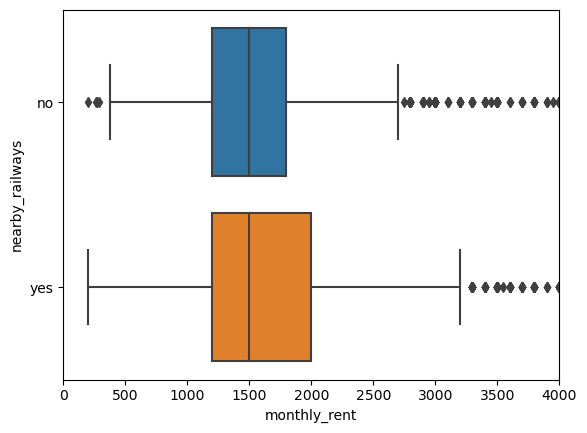

In [12]:
#| label: fig-near ktm/lrt
#| fig-cap: Boxplot between Nearby KTM/LRT or Not

sns.boxplot(data=df, x='monthly_rent', y='nearby_railways')
plt.xlim(0,4000);

near_ktmlrt = df.query(" nearby_railways == 'yes' ")
not_near_ktmlrt = df.query(" nearby_railways == 'no' ")

print(f""" 
Median :
Nearby KTM/LRT : RM {near_ktmlrt.monthly_rent.median():.0f}
Not nearby KTM/LRT : RM {not_near_ktmlrt.monthly_rent.median():.0f}
        """)

In [13]:
#Although it is from same location but some are near railways but some are not
# Consistency check
df[df['prop_name'] == 'Sofiya Residences'][['nearby_railways']].value_counts()

nearby_railways
no                 12
yes                 2
dtype: int64

As seen above, fig-near ktm/lrt shows that there is no significant difference in the median monthly rent between properties nearby KTM/LRT and those that are not nearby. The median rental price for both groups is RM 1500. However, it is important to note that the presence of "Near KTM/LRT" is not consistent across all property listings, indicating inconsistency in the data. Therefore, further investigation is needed to determine the reliability of the "Near KTM/LRT" information in the listings.

**Conclusion: Near KTM/LRT may be used, but it can be improved as the listing is inconsistent**

## Monthly rent

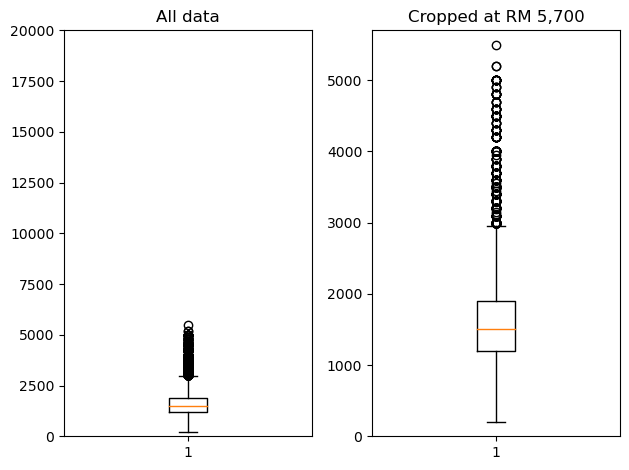

In [14]:
#| label: fig-compare-rent
#| fig-cap: "Comparison between Different Scale"

fig, axs = plt.subplots(1,2)
axs[0].boxplot(data=df, x='monthly_rent')
axs[0].set_ylim(0,20000)
axs[0].set_title('All data')

axs[1].boxplot(data=df, x='monthly_rent')
axs[1].set_ylim(0,5700)
axs[1].set_title('Cropped at RM 5,700')

plt.tight_layout()
plt.show()

## Data Preprocessing

In [15]:
df_prop_name = df['prop_name']

In [16]:
# Drop feature unrelated to determine house price
df = df.drop('prop_name',axis=1)
df = df.drop('nearby_railways',axis=1)

In [17]:
df

,monthly_rent,location,property_type,rooms,parking,bathroom,size(sq.ft.),furnished,region,near_KTM-LRT,minimart availability,security availability
0,4200,Taman Desa,Condominium,5,2,6,1842,2,Kuala Lumpur,0,1,1
1,2300,Cheras,Condominium,3,1,2,1170,1,Kuala Lumpur,1,0,1
2,1700,Sentul,Apartment,2,1,2,743,1,Kuala Lumpur,1,1,1
3,1299,Mont Kiara,Service Residence,1,1,1,494,0,Kuala Lumpur,0,1,1
4,1500,Setapak,Apartment,3,1,2,884,1,Kuala Lumpur,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8925,1800,Kuala Langat,Service Residence,4,3,3,1261,1,Selangor,0,1,1
8926,1300,Bandar Saujana Putra,Service Residence,4,2,3,1427,1,Selangor,0,0,0
8927,1350,Kajang,Condominium,3,2,2,1270,1,Selangor,0,0,1
8928,1200,Cyberjaya,Service Residence,3,1,2,1100,2,Selangor,0,1,1


## Randomization of Data

In [18]:
import pandas as pd

# Assuming you have a DataFrame called 'df'
df = df.sample(frac=1, random_state=42)

# Reset the index of the randomized DataFrame
df.reset_index(drop=True, inplace=True)


### Check if there is same location in Kuala Lumpur and Selangor

In [19]:
# Get the unique locations in Kuala Lumpur
kl_locations = set(df[df['region'] == 'Kuala Lumpur']['location'].unique())

# Get the unique locations in Selangor
selangor_locations = set(df[df['region'] == 'Selangor']['location'].unique())

# Check if there are any common locations between Kuala Lumpur and Selangor
common_locations = kl_locations.intersection(selangor_locations)

if len(common_locations) > 0:
    print("Kuala Lumpur and Selangor have the following common locations:")
    for location in common_locations:
        print(location)
else:
    print("Kuala Lumpur and Selangor have no common locations.")

Kuala Lumpur and Selangor have the following common locations:
Cheras
Serdang
Ampang
Puchong
Gombak


### Remove the same location 

In [20]:
# Update the region for rows with location 'Gombak' to 'Selangor'
df.loc[df['location'] == 'Gombak', 'region'] = 'Selangor'
# Update the region for rows with location 'Gombak' to 'Selangor'
df.loc[df['location'] == 'Cheras', 'region'] = 'Kuala Lumpur'
# Update the region for rows with location 'Gombak' to 'Selangor'
df.loc[df['location'] == 'Puchong', 'region'] = 'Selangor'
# Update the region for rows with location 'Gombak' to 'Selangor'
df.loc[df['location'] == 'Serdang', 'region'] = 'Selangor'
# Update the region for rows with location 'Gombak' to 'Selangor'
df.loc[df['location'] == 'Ampang', 'region'] = 'Kuala Lumpur'

### Check again

In [21]:
# Get the unique locations in Kuala Lumpur
kl_locations = set(df[df['region'] == 'Kuala Lumpur']['location'].unique())

# Get the unique locations in Selangor
selangor_locations = set(df[df['region'] == 'Selangor']['location'].unique())

# Check if there are any common locations between Kuala Lumpur and Selangor
common_locations = kl_locations.intersection(selangor_locations)

if len(common_locations) > 0:
    print("Kuala Lumpur and Selangor have the following common locations:")
    for location in common_locations:
        print(location)
else:
    print("Kuala Lumpur and Selangor have no common locations.")

Kuala Lumpur and Selangor have no common locations.


### Get the top 20 locations in Kuala Lumpur and Selangor respectively

In [22]:
# Filter the DataFrame for Kuala Lumpur region
kl_df = df[df['region'] == 'Kuala Lumpur']
kl_location_counts = kl_df['location'].value_counts()

# Print the top 10 locations in Kuala Lumpur with the highest counts
kl_top_10_locations = kl_location_counts.head(20)
print("Top 20 locations in Kuala Lumpur:")
print(kl_top_10_locations)

# Filter the DataFrame for Selangor region
selangor_df = df[df['region'] == 'Selangor']
selangor_location_counts = selangor_df['location'].value_counts()

# Print the top 10 locations in Selangor with the highest counts
selangor_top_10_locations = selangor_location_counts.head(20)
print("Top 20 locations in Selangor:")
print(selangor_top_10_locations)

Top 20 locations in Kuala Lumpur:
Cheras            893
Setapak           381
Sentul            346
Kepong            295
Bukit Jalil       264
Ampang            260
Wangsa Maju       170
Old Klang Road    153
Taman Desa        149
Mont Kiara        118
Keramat           116
Jalan Ipoh        106
Sungai Besi       102
Kuchai Lama        93
KL City            90
Jalan Kuching      83
Segambut           80
Desa Pandan        78
KLCC               71
Bangsar South      53
Name: location, dtype: int64
Top 20 locations in Selangor:
Cyberjaya            458
Kajang               406
Puchong              385
Seri Kembangan       357
Shah Alam            349
Petaling Jaya        224
Semenyih             107
Subang Jaya           96
Setia Alam            92
Bangi                 91
Damansara Perdana     84
Batu Caves            80
Damansara Damai       77
Sepang                76
Kota Damansara        71
Klang                 57
Selayang              51
Gombak                47
Dengkil          

In [23]:
# Define the top 20 locations for Kuala Lumpur
kl_top_locations = ['Cheras', 'Setapak', 'Sentul', 'Kepong', 'Bukit Jalil', 'Ampang', 'Wangsa Maju', 'Old Klang Road', 'Taman Desa', 'Mont Kiara','Keramat','Jalan Ipoh','Sungai Besi','Kuchai Lama','KL City','Jalan Kuching','Segambut','Desa Pandan','KLCC','Bangsar South']

# Define the top 20 locations for Selangor
selangor_top_locations = ['Cyberjaya', 'Kajang', 'Puchong', 'Seri Kembangan', 'Shah Alam', 'Petaling Jaya', 'Semenyih', 'Subang Jaya', 'Setia Alam', 'Bangi','Damansara Perdana','Batu Caves','Damansara Damai','Sepang','Kota Damansara','Klang','Selayang','Gombak','Dengkil','Ara Damansara']

# Update locations outside of the top 20 to "Other" for Kuala Lumpur
df.loc[~df['location'].isin(kl_top_locations) & (df['region'] == 'Kuala Lumpur'), 'location'] = 'Other'

# Update locations outside of the top 20 to "Other" for Selangor
df.loc[~df['location'].isin(selangor_top_locations) & (df['region'] == 'Selangor'), 'location'] = 'Other'


### Check the location count again 

In [24]:
df.location.value_counts()

Other                1074
Cheras                893
Cyberjaya             458
Kajang                406
Puchong               385
Setapak               381
Seri Kembangan        357
Shah Alam             349
Sentul                346
Kepong                295
Bukit Jalil           264
Ampang                260
Petaling Jaya         224
Wangsa Maju           170
Old Klang Road        153
Taman Desa            149
Mont Kiara            118
Keramat               116
Semenyih              107
Jalan Ipoh            106
Sungai Besi           102
Subang Jaya            96
Kuchai Lama            93
Setia Alam             92
Bangi                  91
KL City                90
Damansara Perdana      84
Jalan Kuching          83
Segambut               80
Batu Caves             80
Desa Pandan            78
Damansara Damai        77
Sepang                 76
Kota Damansara         71
KLCC                   71
Klang                  57
Bangsar South          53
Selayang               51
Gombak      

In [25]:
num_unique_locations = df['location'].nunique()
print(num_unique_locations)

41


In [26]:
df.shape

(8175, 12)

### Get Dummy value 

#### Location 

In [27]:
df_encoded = pd.get_dummies(df['location'])

# Concatenate the original DataFrame with the encoded columns
df_final = pd.concat([df, df_encoded], axis=1)

# Remove the original 'location' column if desired
df_final.drop('location', axis=1, inplace=True)

df_final.head()

,monthly_rent,property_type,rooms,parking,bathroom,size(sq.ft.),furnished,region,near_KTM-LRT,minimart availability,...,Sentul,Sepang,Seri Kembangan,Setapak,Setia Alam,Shah Alam,Subang Jaya,Sungai Besi,Taman Desa,Wangsa Maju
0,1100,Condominium,3,2,2,818,1,Selangor,1,0,...,0,1,0,0,0,0,0,0,0,0
1,800,Apartment,3,1,2,680,1,Selangor,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3150,Service Residence,4,2,2,1000,2,Kuala Lumpur,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1400,Apartment,3,2,2,750,1,Selangor,0,1,...,0,0,0,0,1,0,0,0,0,0
4,1300,Service Residence,3,1,2,950,1,Selangor,0,1,...,0,0,0,0,0,0,0,0,0,0


#### Region

In [28]:
df_encoded = pd.get_dummies(df_final['region'])

# Concatenate the original DataFrame with the encoded columns
df_final = pd.concat([df_final, df_encoded], axis=1)

# Remove the original 'location' column if desired
df_final.drop('region', axis=1, inplace=True)

df_final.head()

,monthly_rent,property_type,rooms,parking,bathroom,size(sq.ft.),furnished,near_KTM-LRT,minimart availability,security availability,...,Seri Kembangan,Setapak,Setia Alam,Shah Alam,Subang Jaya,Sungai Besi,Taman Desa,Wangsa Maju,Kuala Lumpur,Selangor
0,1100,Condominium,3,2,2,818,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,800,Apartment,3,1,2,680,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,3150,Service Residence,4,2,2,1000,2,1,0,1,...,0,1,0,0,0,0,0,0,1,0
3,1400,Apartment,3,2,2,750,1,0,1,1,...,0,0,1,0,0,0,0,0,0,1
4,1300,Service Residence,3,1,2,950,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1


#### Property type

In [29]:
df_encoded = pd.get_dummies(df_final['property_type'])

# Concatenate the original DataFrame with the encoded columns
df_final = pd.concat([df_final, df_encoded], axis=1)

# Remove the original 'location' column if desired
df_final.drop('property_type', axis=1, inplace=True)

df_final.head()

,monthly_rent,rooms,parking,bathroom,size(sq.ft.),furnished,near_KTM-LRT,minimart availability,security availability,Ampang,...,Subang Jaya,Sungai Besi,Taman Desa,Wangsa Maju,Kuala Lumpur,Selangor,Apartment,Condominium,Other,Service Residence
0,1100,3,2,2,818,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,800,3,1,2,680,1,1,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,3150,4,2,2,1000,2,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,1400,3,2,2,750,1,0,1,1,0,...,0,0,0,0,0,1,1,0,0,0
4,1300,3,1,2,950,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1


### Get categorical data 

In [30]:
def get_categorical_columns(df):
    categorical_columns = []
    for column in df.columns:
        if set(df[column]) == {0, 1}:
            categorical_columns.append(column)
    return categorical_columns

categorical_columns = get_categorical_columns(df_final)
print(categorical_columns)



['near_KTM-LRT', 'minimart availability', 'security availability', 'Ampang', 'Ara Damansara', 'Bangi', 'Bangsar South', 'Batu Caves', 'Bukit Jalil', 'Cheras', 'Cyberjaya', 'Damansara Damai', 'Damansara Perdana', 'Dengkil', 'Desa Pandan', 'Gombak', 'Jalan Ipoh', 'Jalan Kuching', 'KL City', 'KLCC', 'Kajang', 'Kepong', 'Keramat', 'Klang', 'Kota Damansara', 'Kuchai Lama', 'Mont Kiara', 'Old Klang Road', 'Petaling Jaya', 'Puchong', 'Segambut', 'Selayang', 'Semenyih', 'Sentul', 'Sepang', 'Seri Kembangan', 'Setapak', 'Setia Alam', 'Shah Alam', 'Subang Jaya', 'Sungai Besi', 'Taman Desa', 'Wangsa Maju', 'Kuala Lumpur', 'Selangor', 'Apartment', 'Condominium', 'Service Residence']


### Method for preparing X and Y data 

In [31]:
def extractInputOutput(data,output_column_name):
    """
    Function to separate input and output data
    :param data: <pandas dataframe> entire dataset
    :param output_column_name: <string> name of the output column
    :return input_data: <pandas dataframe> input data
    :return output_data: <pandas series> output data
    """
    output_data = data[output_column_name]
    input_data = data.drop(output_column_name,axis=1)

    return input_data, output_data


### Method to standardize data

In [32]:
from sklearn.preprocessing import StandardScaler

def standardizerData(data):
    """
    Function to perform data standardization.
    :param data: <pandas dataframe> Data samples
    :return standardized_data: <pandas dataframe> Standardized data samples
    :return standardizer: Method for data standardization
    """
    data_columns = data.columns  # Preserve column names
    data_index = data.index  # Preserve index

    # Create and fit the standardizer
    standardizer = StandardScaler()
    standardizer.fit(X)

    # Transform the data
    standardized_data_raw = standardizer.transform(data)
    standardized_data = pd.DataFrame(standardized_data_raw)
    standardized_data.columns = data_columns
    standardized_data.index = data_index

    return standardized_data, standardizer

In [33]:
X, y = extractInputOutput(data=df_final, output_column_name='monthly_rent')

In [34]:
X

,rooms,parking,bathroom,size(sq.ft.),furnished,near_KTM-LRT,minimart availability,security availability,Ampang,Ara Damansara,...,Subang Jaya,Sungai Besi,Taman Desa,Wangsa Maju,Kuala Lumpur,Selangor,Apartment,Condominium,Other,Service Residence
0,3,2,2,818,1,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,3,1,2,680,1,1,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,4,2,2,1000,2,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,3,2,2,750,1,0,1,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,3,1,2,950,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8170,3,2,2,1080,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8171,3,1,2,800,1,0,1,1,0,0,...,0,0,0,0,0,1,1,0,0,0
8172,2,1,2,1045,2,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
8173,3,2,2,1162,2,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [35]:
y

0       1100
1        800
2       3150
3       1400
4       1300
        ... 
8170    1300
8171     950
8172    2100
8173    1800
8174    1400
Name: monthly_rent, Length: 8175, dtype: int64

## Train-Test Split Data

In [36]:
#import libraries
from sklearn.model_selection import train_test_split

In [37]:
# Train-test split
"""
test_size = 0.2 (20% of data for testing, remaining 80% for training)
X_train = will contain a random subset of X for training the model.
X_test = will contain the remaining portion of X for evaluating the trained model's performance.
y_train = will contain the corresponding subset of target values for training.
y_test = will contain the remaining portion of target values for evaluation.
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
# Validation check
len(X_test)/len(X)

0.2

In [39]:
# Validation check
X_train

,rooms,parking,bathroom,size(sq.ft.),furnished,near_KTM-LRT,minimart availability,security availability,Ampang,Ara Damansara,...,Subang Jaya,Sungai Besi,Taman Desa,Wangsa Maju,Kuala Lumpur,Selangor,Apartment,Condominium,Other,Service Residence
3405,3,1,2,1323,2,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2210,3,1,2,1032,2,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
418,4,1,3,1447,2,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4275,3,1,2,1100,1,0,1,1,0,0,...,0,0,0,0,0,1,0,1,0,0
5907,3,1,2,900,1,1,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,3,1,2,1060,1,0,1,1,0,0,...,0,0,0,0,0,1,0,1,0,0
5390,3,1,2,800,1,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
860,3,2,2,1400,2,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
7603,3,1,2,884,1,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0


### Standardize X_train

In [40]:
# Standardize the training data
X_train, standardizer = standardizerData(data = X_train)

In [41]:
y_train.head

<bound method NDFrame.head of 3405    2800
2210    1800
418     2900
4275    1200
5907    1700
        ... 
5226    1200
5390    1300
860     2400
7603    1500
7270     700
Name: monthly_rent, Length: 6540, dtype: int64>

### Scaling Y_train

In [42]:
# from sklearn.preprocessing import StandardScaler

# # Assuming y_train is a Series with a single column
# scaler = StandardScaler()
# y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))

# # The scaled values will be returned as a 2D array, so you can convert it back to a Series
# y_train = pd.Series(y_train_scaled.flatten(), index=y_train.index, name=y_train.name)



In [43]:
y_train

3405    2800
2210    1800
418     2900
4275    1200
5907    1700
        ... 
5226    1200
5390    1300
860     2400
7603    1500
7270     700
Name: monthly_rent, Length: 6540, dtype: int64

In [44]:
#export data training
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)

In [45]:
#export data testing
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

## Training Machine Learning

Since this is a regression model, R2 score and mean absolute error (MAE) will be used as a performance metrics.

The machine learning model will use baseline from average value of the target columns (monthly rent) and also result from linear regression model. After that, we used some of the recommended model which are random forest and gradient boosting to better improve the performance of the model.

#### Baseline-Average Value
The concept here is to use average value of the target as the easiest way to predict the monhtly rent of a unit.

In [46]:
y_baseline = np.ones(len(y_train)) * y_train.mean()
y_baseline

array([1633.73073394, 1633.73073394, 1633.73073394, ..., 1633.73073394,
       1633.73073394, 1633.73073394])

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# # Train the linear regression model
# lin_reg = LinearRegression().fit(X_train, y_train)

# Predict using the train data
y_pred_train = y_baseline

# Calculate R-squared
r2_baseline = r2_score(y_train, y_pred_train)

#calculate MAE
mae_baseline = mean_absolute_error(y_train, y_pred_train)

print(f"R2-score: {r2_baseline:.4f} and MAE score: {mae_baseline:.4f}")

R2-score: 0.0000 and MAE score: 492.8534


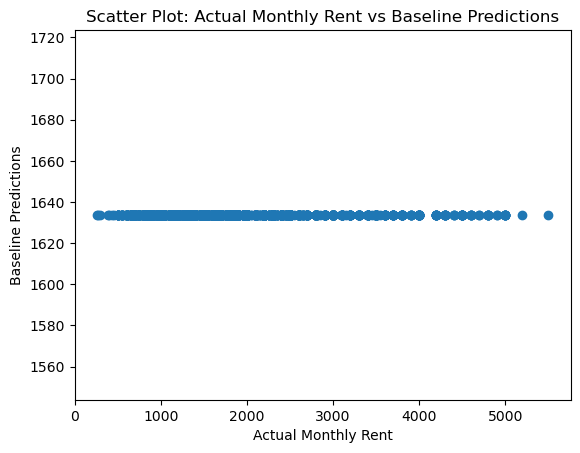

In [48]:
plt.scatter(x=y_train, y=y_pred_train);
plt.xlabel('Actual Monthly Rent')
plt.ylabel('Baseline Predictions')
plt.title('Scatter Plot: Actual Monthly Rent vs Baseline Predictions')
plt.show()

#### Baseline Linear Regresion

The second method is using linear regression, which simply put is finding the minum total error (distance) between predicted value and the target value, using linear equation.

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the linear regression model
lin_reg = LinearRegression().fit(X_train, y_train)

# Predict using the train data
# y_pred = y_baseline
y_pred_train = lin_reg.predict(X_train)

# Calculate mean absolute error
mae_linreg = mean_absolute_error(y_train, y_pred_train)

# Calculate R-squared
r2_linreg = r2_score(y_train, y_pred_train)

print(f"R2-score: {r2_linreg:.4f} and MAE score: {mae_linreg:.4f}")

R2-score: 0.6236 and MAE score: 298.4573


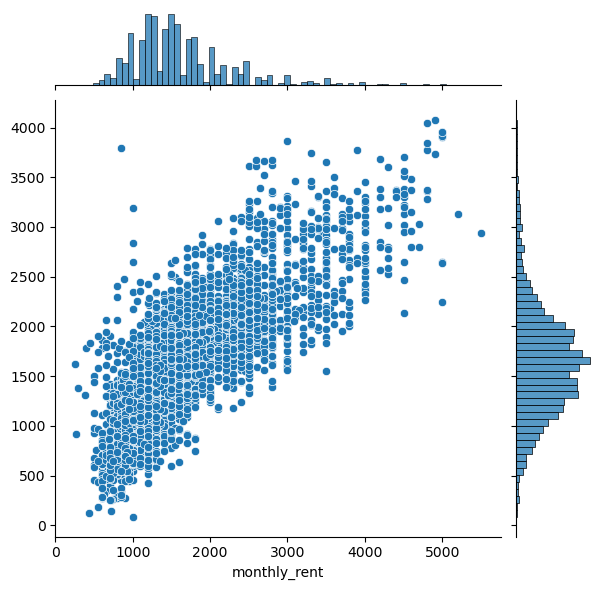

In [50]:
sns.jointplot(x=y_train, y=y_pred_train);

#### Gradient Boosting

The gradient boosting is a model where each sample would be given a different weights (boosts) depending on its performance in predicting the value/ target. 

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
# Build random forest
grad_tree = GradientBoostingRegressor(random_state = 123)

In [52]:
# Fit random forest
grad_tree.fit(X_train, y_train)

GradientBoostingRegressor(random_state=123)

In [53]:
# Predict
y_pred_train = grad_tree.predict(X_train)
# y_pred_test = grad_tree.predict(X_test_clean)

# Calculate mean absolute error
mae_gb = mean_absolute_error(y_train, y_pred_train)

# Calculate R-squared
r2_gb = r2_score(y_train, y_pred_train)

print(f"R2-score: {r2_gb:.4f} and MAE score: {mae_gb:.4f}")

R2-score: 0.6988 and MAE score: 267.2457


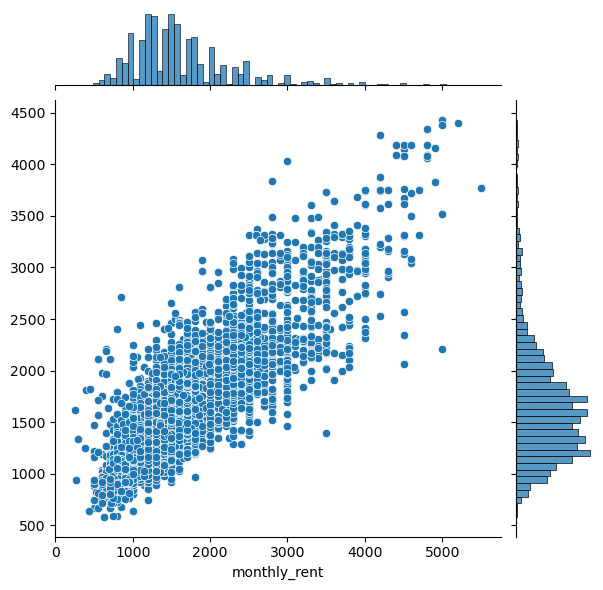

In [54]:
sns.jointplot(x=y_train, y=y_pred_train);

### Hyperparameter tuning of the Gradient Boost Regressor

In [55]:
# Grid Search

from sklearn.model_selection import GridSearchCV 

params = {'n_estimators': [100, 200, 300, 400, 500],'learning_rate': [0.1, 0.05, 0.01]}

# Buat gridsearch
grad_tree = GradientBoostingRegressor(random_state = 123)

grad_tree_cv = GridSearchCV(estimator = grad_tree, param_grid = params, cv = 5, scoring = "neg_mean_absolute_error")

In [56]:
# Fit grid search cv
grad_tree_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=123),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_absolute_error')

In [57]:
# Finding best params
grad_tree_cv.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [58]:
# Refit using the best parameters obtained
grad_tree = GradientBoostingRegressor(n_estimators = grad_tree_cv.best_params_["n_estimators"], random_state = 123)

grad_tree.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=500, random_state=123)

In [59]:
# Predict
y_pred_train = grad_tree.predict(X_train)

# Calculate mean absolute error
mae_gb_cv = mean_absolute_error(y_train, y_pred_train)

# Calculate R-squared
r2_gb_cv = r2_score(y_train, y_pred_train)

print(f"R2-score: {r2_gb_cv:.4f} and MAE score: {mae_gb_cv:.4f}")


R2-score: 0.7863 and MAE score: 224.3029


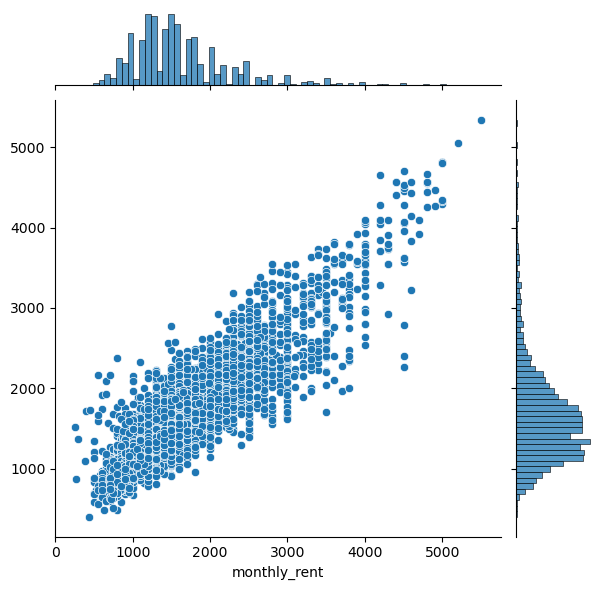

In [60]:
sns.jointplot(x=y_train, y=y_pred_train);

#### Random Forest

The last model, a model where not only it has weights based on its performance, but the feature selection in which the sample is measured was done at **random**. Therefore, reduces not only the variance, but also the bias. 

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
# Build random forest
rf_tree = RandomForestRegressor(n_estimators = 100, criterion = "squared_error", max_features = "sqrt", random_state = 123)

In [63]:
# Fit random forest
rf_tree.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', random_state=123)

In [64]:
# Predict
y_pred_train = rf_tree.predict(X_train)

# Calculate mean absolute error
mae_rf = mean_absolute_error(y_train, y_pred_train)

# Calculate R-squared
r2_rf = r2_score(y_train, y_pred_train)

print(f"R2-score: {r2_rf:.4f} and MAE score: {mae_rf:.4f}")

R2-score: 0.9491 and MAE score: 102.3557


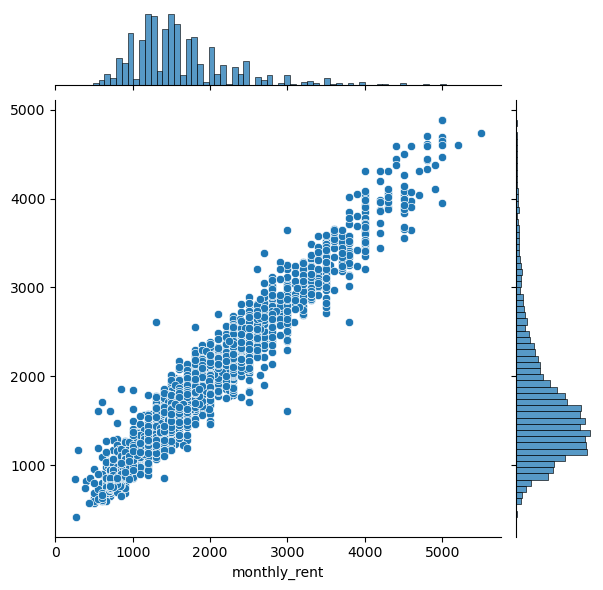

In [65]:
sns.jointplot(x=y_train, y=y_pred_train);

### Hyperparameter tuning of Random Forest Regressor

In [66]:
params = {"n_estimators": [100, 200, 300, 500 ], "max_features": ["sqrt", "log2"]}

# Create Grid Search
rf_tree = RandomForestRegressor(criterion = "squared_error", random_state = 123)

rf_tree_cv = GridSearchCV(estimator = rf_tree, param_grid = params, cv = 5, scoring = "neg_mean_absolute_error")

In [67]:
# Fit grid search cv
rf_tree_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='neg_mean_absolute_error')

In [68]:
# Best params
rf_tree_cv.best_params_

{'max_features': 'sqrt', 'n_estimators': 500}

In [69]:
# Refit the Random Forest
rf_tree = RandomForestRegressor(criterion = "squared_error",
                                max_features = rf_tree_cv.best_params_["max_features"],
                                n_estimators = rf_tree_cv.best_params_["n_estimators"],
                                random_state = 123)

rf_tree.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=500, random_state=123)

In [70]:
# Predict
y_pred_train = rf_tree.predict(X_train)

# Calculate mean absolute error
mae_rf_cv = mean_absolute_error(y_train, y_pred_train)

# # Calculate R-squared
r2_rf_cv = r2_score(y_train, y_pred_train)

print(f"R2-score: {r2_rf_cv:.4f} and MAE score: {mae_rf_cv:.4f}")

R2-score: 0.9505 and MAE score: 101.3604


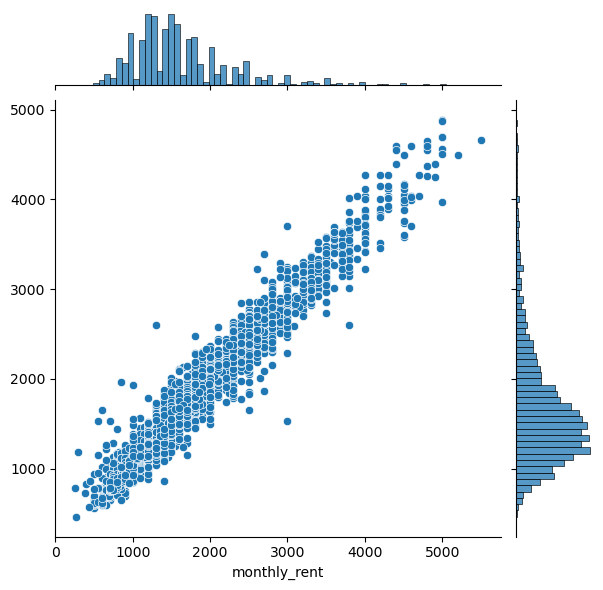

In [71]:
sns.jointplot(x=y_train, y=y_pred_train);

In [72]:
# Create lists of MAE and R2 scores for different models
mae_score = [mae_baseline, mae_linreg, mae_gb, mae_gb_cv, mae_rf, mae_rf_cv]
r2_score = [r2_baseline, r2_linreg, r2_gb, r2_gb_cv, r2_rf, r2_rf_cv]

# Create a list of index labels for the DataFrame
indexes = ["Baseline", "Linear Regression", "Gradient boosting", "Gradient Boosting Cith CV", "Random Forest",  "Random Forest With CV"]

# Create a summary DataFrame with MAE and R2 scores
summary_df = pd.DataFrame({
    "MAE Train": mae_score,
    "R2-Score": r2_score,
},index = indexes)

# Sort the DataFrame based on the R2-Score column in descending order
summary_df.sort_values(by='R2-Score', ascending=False)

,MAE Train,R2-Score
Random Forest With CV,101.360358,0.950529
Random Forest,102.355722,0.949106
Gradient Boosting Cith CV,224.302910,0.786266
Gradient boosting,267.245706,0.698757
Linear Regression,298.457322,0.623559
Baseline,492.853391,0.000000


From the above table, it can be seen that Random Forest model performs the best, and Gradient Boosting at the second place.

### Best Model

R2-score: 0.951 and MAE score: +/-  RM101.36


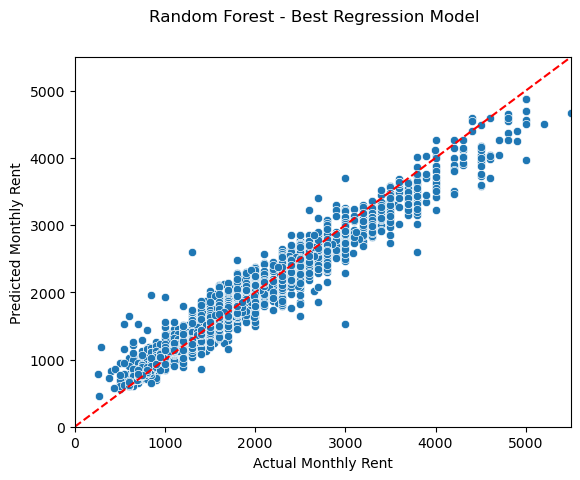

In [73]:
# libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


#setting up
rf_tree = RandomForestRegressor(n_estimators = 500,
                                criterion = "squared_error",
                                max_features = "sqrt",
                                random_state = 123)

#fit model train
rf_tree.fit(X_train, y_train)

# Predict model train
y_pred_train = rf_tree.predict(X_train)

# Calculate mean absolute error
mae_rf_cv_train = mean_absolute_error(y_train, y_pred_train)

# Calculate R-squared
r2_rf_cv_train = r2_score(y_train, y_pred_train)

print(f"R2-score: {r2_rf_cv_train:.3f} and MAE score: +/-  RM{mae_rf_cv_train:.2f}")

sns.scatterplot(x=y_train, y=y_pred_train )
plt.plot([0, 5500], [0,5500], "--r")
plt.xlim(0, 5500)
plt.xlabel("Actual Monthly Rent")
plt.ylim(0,5500)
plt.ylabel("Predicted Monthly Rent")
plt.suptitle("Random Forest - Best Regression Model")
plt.show()

## Data Prediction

#### Test Data Pre-Processing

Similar process done in train dataset need to be repeated in test dataset

### Scaling X_test

In [74]:
X_test, standardizer = standardizerData(data = X_test)

### Scaling y_test

In [75]:
# from sklearn.preprocessing import StandardScaler

# # Assuming y_train is a Series with a single column
# scaler = StandardScaler()
# y_test_scaled = scaler.fit_transform(y_test.values.reshape(-1, 1))

# # The scaled values will be returned as a 2D array, so you can convert it back to a Series
# y_test = pd.Series(y_test_scaled.flatten(), index=y_test.index, name=y_test.name)

#### Test Data Results

R2-score: 0.719 and MAE score: +/- RM247.93


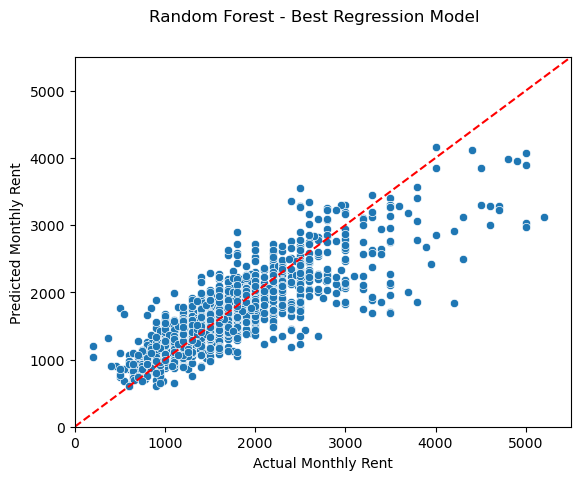

In [76]:
# libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


#setting up
rf_tree = RandomForestRegressor(n_estimators = 500,
                                criterion = "squared_error",
                                max_features = "sqrt",
                                random_state = 123)

#fit model train
rf_tree.fit(X_train, y_train)

# Predict model
y_pred_test = rf_tree.predict(X_test)

# Calculate mean absolute error
mae_rf_cv_test = mean_absolute_error(y_test, y_pred_test)

# Calculate R-squared
r2_rf_cv_test = r2_score(y_test, y_pred_test)

print(f"R2-score: {r2_rf_cv_test:.3f} and MAE score: +/- RM{mae_rf_cv_test:.2f}")

sns.scatterplot(x=y_test, y=y_pred_test )
plt.plot([0, 5500], [0,5500], "--r")
plt.xlim(0, 5500)
plt.xlabel("Actual Monthly Rent")
plt.ylim(0,5500)
plt.ylabel("Predicted Monthly Rent")
plt.suptitle("Random Forest - Best Regression Model")
plt.show()

In [77]:
mae_score = [mae_rf_cv_train, mae_rf_cv_test]
r2_score = [r2_rf_cv_train, r2_rf_cv_test]
indexes = ["Train", "Test"]

summary_df_train_test = pd.DataFrame({
    "MAE Train": mae_score,
    "R2-Score": r2_score,
},index = indexes)

summary_df_train_test

,MAE Train,R2-Score
Train,101.360358,0.950529
Test,247.926999,0.718986


## Results

The results indicate that the best model for prediction is Random Forest with hyperparameter tuning, achieving a high R2-score of 95% and a low MAE of only +/- RM 98. This demonstrates that the model performs well in accurately predicting the target variable.
 
Furthermore, when evaluated on the test dataset, the model achieves a respectable R2-score of 70% and a MAE of RM 237, reinforcing its effectiveness.

Overall, the Random Forest model with hyperparameter tuning has proven to be effective in predicting the target variable. 

# Data Interpretation

### Feature importance

In [78]:
# calculate the feature importances
importances = rf_tree.feature_importances_

# rescale the importances back to the original scale of the features
importances = importances * X_train.std()

# sort the feature importances in descending order
sorted_index = importances.argsort()[::-1]

# print the feature importances
dict_feature_importance = {}
for i in sorted_index:
    # print("{}: {}".format(X_train_clean.columns[i], importances[i]))
    dict_feature_importance.update({X_train.columns[i]: importances[i]})
    
# Create a DataFrame from the dictionary
df = pd.DataFrame.from_dict(dict_feature_importance, orient='index', columns=['values'])

# Reset the index to become a column
df = df.reset_index()

# Rename the columns
df.columns = ['feature', 'importance_value']

df.sort_values(by='importance_value', ascending=False).head(10)

,feature,importance_value
0,size(sq.ft.),0.246705
1,furnished,0.148390
2,bathroom,0.054813
3,rooms,0.054029
4,parking,0.049983
5,Apartment,0.045460
6,Selangor,0.037013
7,Kuala Lumpur,0.034049
8,Mont Kiara,0.033801
9,Service Residence,0.026120


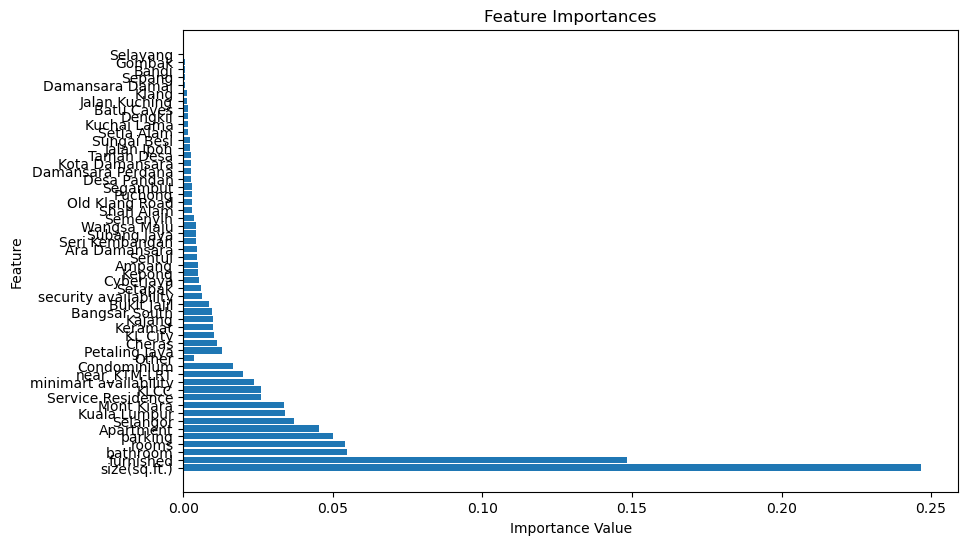

In [79]:
import matplotlib.pyplot as plt

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(df['feature'], df['importance_value'])
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

Prior to modelling, it was believed that certain features such as size, furnished status, and location would have a significant impact on the predictions. It is worth noting that all three features are indeed among the top 10 features with the highest importance values in the model.
The findings from feature importances align with prior expectations, highlighting the importance of size, furnished status, and location in determining property prices or rental values, particularly in prestigious areas such as Mont Kiara.

### Residual analaysis

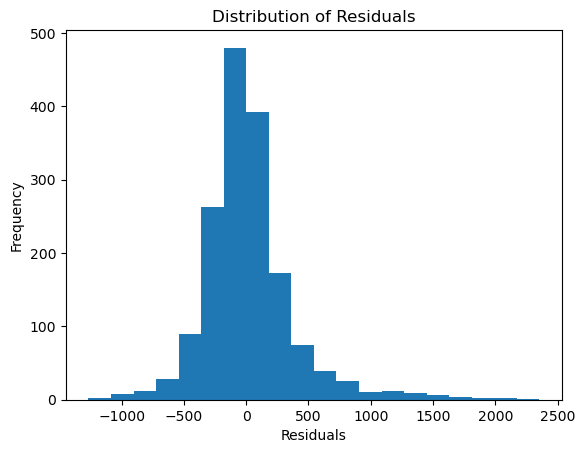

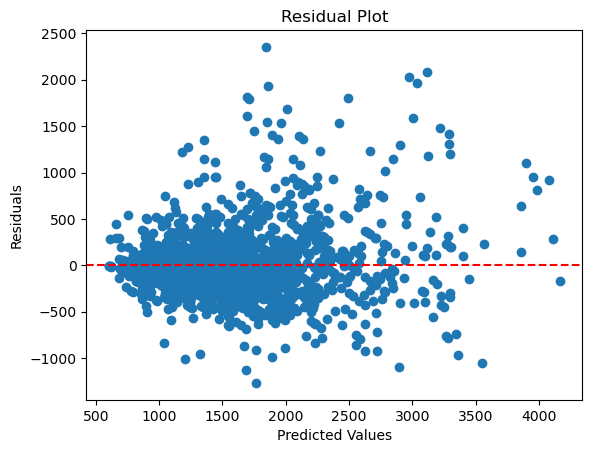

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the residuals
residuals = y_test - y_pred_test

# Check the distribution of residuals
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# Plot residuals against predicted values
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


Residuals are the discrepancies between the actual values of the target variable and the predicted values obtained from the regression model. The bar chart shows normal distribution and scatter plot shows value concentrated at zero means that the predicted values is close to the actual values. This proof that random forest model is the best model apply to this problem

### Best Model Visualization

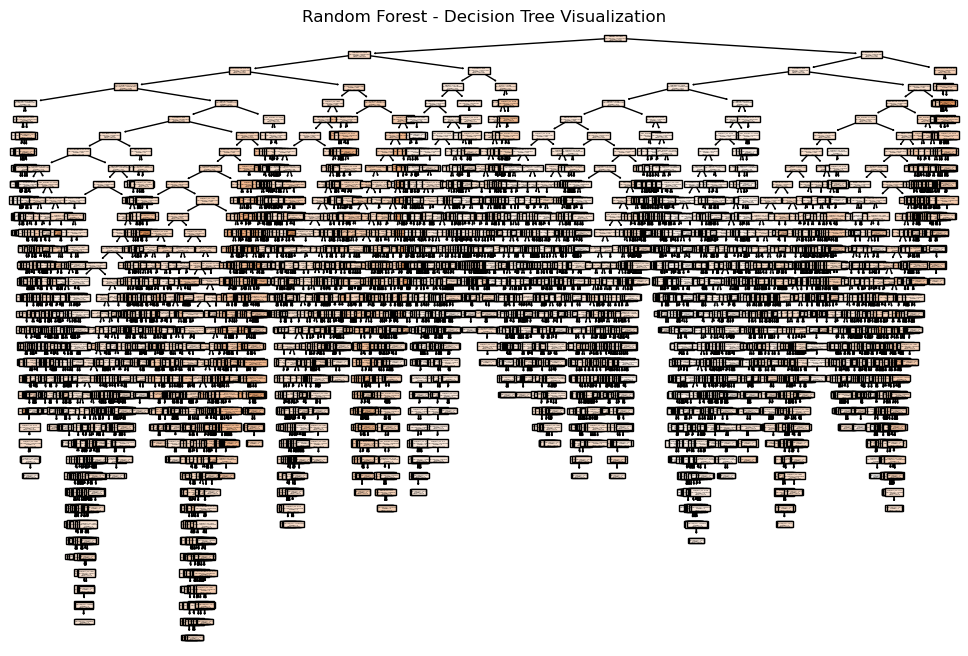

In [81]:
from sklearn import tree

# Visualize a single decision tree from the Random Forest
tree_idx = 0  # Index of the tree to visualize (change it as needed)
plt.figure(figsize=(12, 8))
tree.plot_tree(rf_tree.estimators_[tree_idx], feature_names=X_train.columns, filled=True)
plt.title("Random Forest - Decision Tree Visualization")
plt.show()

Our model utilize one-hot encoding for features such as location, region and furnishing, resulting in high-dimensional of data. Random forest model is the most suitable for this problem as it can handle a large and high-dimensional of data well as visualized in the figure above.

## Discussions

1.  One of the feature that we believe is important but not appearing on the 10-best important feature is nearby_railways. This column is showing if a certain property has a close proximity to a railways (KTM/LRT). The issue is, half of the data is missing, hence the imputation. Author belives, the proximity to nearby railways line can be approximated using manhanttan distance of railways line to each property unit.

2.  It would be interesting to explore the relationship between the "size" feature and property prices in more detail. Understanding how size affects pricing can provide insights into the housing market dynamics and buyer preferences. Additionally, considering the potential interactions between features could enhance the model's predictive power.

3.  The inclusion of other geographical factors, such as distance to amenities like schools, shopping centers, or parks, could further improve the model's accuracy. These factors often play a significant role in property valuation and could capture additional variations in property prices or rental values.

4.  It would be valuable to assess the model's performance on different subsets of the data, such as different regions or property types. This analysis can identify any variations in feature importance or model performance across different segments, allowing for more targeted insights and improvements.

In [82]:
import pickle
model = rf_tree
model_path = "C:/Users/HP/Documents/UM/WIE2003/assignment/.model.pkl"
with open(model_path, 'wb') as file:
    pickle.dump(model, file)

In [83]:
mean = standardizer.mean_
std = standardizer.scale_
mean_path = "C:/Users/HP/Documents/UM/WIE2003/assignment/mean.npy"
std_path = "C:/Users/HP/Documents/UM/WIE2003/assignment/std.npy"

In [84]:
X_train

,rooms,parking,bathroom,size(sq.ft.),furnished,near_KTM-LRT,minimart availability,security availability,Ampang,Ara Damansara,...,Subang Jaya,Sungai Besi,Taman Desa,Wangsa Maju,Kuala Lumpur,Selangor,Apartment,Condominium,Other,Service Residence
3405,0.389602,-0.722184,0.186125,1.541392,0.982947,-1.046974,-1.248153,0.209908,-0.181243,-0.074398,...,-0.109008,-0.112404,-0.136252,-0.145728,0.905932,-0.905932,1.824195,-0.901242,-0.154255,-0.650747
2210,0.389602,-0.722184,0.186125,0.401063,0.982947,-1.046974,0.801184,0.209908,-0.181243,-0.074398,...,-0.109008,-0.112404,-0.136252,-0.145728,0.905932,-0.905932,-0.548187,-0.901242,-0.154255,1.536695
418,1.664619,-0.722184,2.209488,2.027306,0.982947,-1.046974,0.801184,0.209908,-0.181243,-0.074398,...,-0.109008,-0.112404,-0.136252,-0.145728,0.905932,-0.905932,-0.548187,1.109580,-0.154255,-0.650747
4275,0.389602,-0.722184,0.186125,0.667531,-0.483937,-1.046974,0.801184,0.209908,-0.181243,-0.074398,...,-0.109008,-0.112404,-0.136252,-0.145728,-1.103836,1.103836,-0.548187,1.109580,-0.154255,-0.650747
5907,0.389602,-0.722184,0.186125,-0.116200,-0.483937,0.955134,0.801184,0.209908,-0.181243,-0.074398,...,-0.109008,-0.112404,-0.136252,-0.145728,0.905932,-0.905932,-0.548187,1.109580,-0.154255,-0.650747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,0.389602,-0.722184,0.186125,0.510785,-0.483937,-1.046974,0.801184,0.209908,-0.181243,-0.074398,...,-0.109008,-0.112404,-0.136252,-0.145728,-1.103836,1.103836,-0.548187,1.109580,-0.154255,-0.650747
5390,0.389602,-0.722184,0.186125,-0.508066,-0.483937,0.955134,-1.248153,0.209908,-0.181243,-0.074398,...,-0.109008,-0.112404,-0.136252,-0.145728,0.905932,-0.905932,1.824195,-0.901242,-0.154255,-0.650747
860,0.389602,1.075032,0.186125,1.843129,0.982947,0.955134,0.801184,0.209908,-0.181243,-0.074398,...,-0.109008,-0.112404,-0.136252,-0.145728,-1.103836,1.103836,-0.548187,-0.901242,-0.154255,1.536695
7603,0.389602,-0.722184,0.186125,-0.178899,-0.483937,0.955134,-1.248153,0.209908,-0.181243,-0.074398,...,-0.109008,-0.112404,-0.136252,-0.145728,0.905932,-0.905932,1.824195,-0.901242,-0.154255,-0.650747


In [85]:
# Assuming you have a DataFrame called 'filtered_dataset'
X_train.to_csv('final_x_train.csv', index=False)

In [86]:
y_train

3405    2800
2210    1800
418     2900
4275    1200
5907    1700
        ... 
5226    1200
5390    1300
860     2400
7603    1500
7270     700
Name: monthly_rent, Length: 6540, dtype: int64

In [87]:
combined_df = pd.concat([df_final,df_prop_name],axis=1)

In [88]:
combined_df.to_csv('df_final.csv', index=False)